# Build the model

In [91]:
import numpy as np

class LinearRegression :
    def __init__(self,lr = 0.001, n_etrs = 1000):
        self.lr  = lr
        self.n_etrs = n_etrs
    
    def fit(self,X,y):
        n_samples , n_features = X.shape
        # Initialize weights
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_etrs):
            predictions = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T,(predictions-y))
            db = (1/n_samples) * np.sum(predictions - y)

            self.weights -= self.lr*dw
            self.bias -= self.lr * db

    def predict(self,X):
        return np.dot(X,self.weights)+self.bias
    
    def parameters(self,X,y):
        self.fit(X,y)
        return self.weights,self.bias
    
    def score(self,X,y):
        y_preds = self.predict(X)
        return ((y-y_preds)**2).mean()



# Test the model

### 1) import dataset

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

X , y = make_regression(n_samples=1000, n_features=1 ,noise=30,random_state = 2 ) 
X.shape  , y.shape

((1000, 1), (1000,))

In [169]:
X_train ,   X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

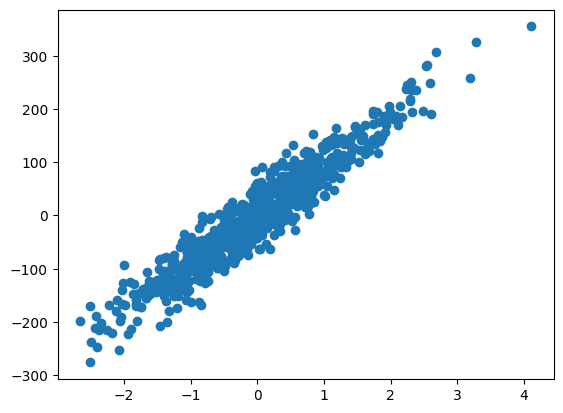

In [170]:
import matplotlib.pyplot as plt 

plt.scatter(X_train,y_train)
plt.show()

### 2) train and test the model 

In [184]:
model = LinearRegression(lr = 0.01,n_etrs=2000)

model.fit(X_train,y_train)

print(f"MSE = {model.score(X_test,y_test)} and RMSE = {np.sqrt(model.score(X_test,y_test))} ")

MSE = 645.3374674247831 and RMSE = 25.403493213036334 


In [185]:
weights , bias = model.parameters(X_train , y_train)

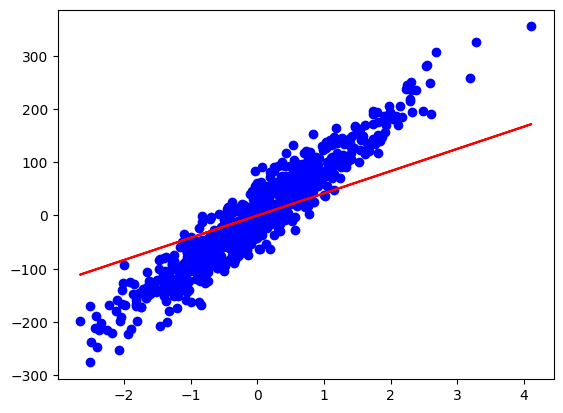

In [186]:
plt.scatter(X_train,y_train, c='b')
plt.plot(X_train , np.dot(X_train, weights)*bias,c= 'r')

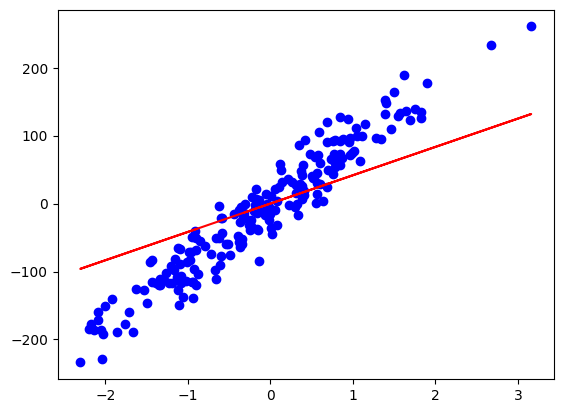

In [187]:
plt.scatter(X_test,y_test, c='b')
plt.plot(X_test , np.dot(X_test, weights)*bias,c= 'r')